<a href="https://colab.research.google.com/github/mhtattersall/LinearRegression/blob/main/HousePricesNY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
house_data = pd.read_csv("/content/sample_data/Statenisland.csv", parse_dates=['SALE DATE'])
house_data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,40,NaN,A1,551 OAKDALE STREET,NaN,...,1.0,0.0,1.0,10000.0,3904.0,1980.0,1,A1,0,02/08/2023
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,8,NaN,A1,18 EDWIN STREET,NaN,...,1.0,0.0,1.0,7000.0,1976.0,1980.0,1,A1,890000,31/01/2024
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,15,NaN,A1,10 EDWIN STREET,NaN,...,1.0,0.0,1.0,7000.0,2200.0,1980.0,1,A1,950000,29/02/2024
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5396,41,NaN,A1,21 TALLMAN STREET,NaN,...,1.0,0.0,1.0,9968.0,3940.0,1990.0,1,A1,0,14/02/2024
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5398,20,NaN,A1,1468 ARDEN AVENUE,NaN,...,1.0,0.0,1.0,5000.0,2200.0,1940.0,1,A1,1050000,06/06/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6792,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,123,NaN,B9,81 ROBIN COURT,NaN,...,2.0,0.0,2.0,6105.0,2160.0,1994.0,1,B9,0,04/12/2023
6793,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,145,NaN,B9,48 ROBIN COURT,NaN,...,2.0,0.0,2.0,3147.0,2400.0,1994.0,1,B9,815000,09/05/2023
6794,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,30,NaN,B9,49 QUAIL LANE,NaN,...,2.0,0.0,2.0,2400.0,2575.0,1998.0,1,B9,782000,24/01/2024
6795,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,84,NaN,B9,74 PHEASANT LANE,NaN,...,2.0,0.0,2.0,2800.0,1714.0,1999.0,1,B9,813000,16/01/2024


In [ ]:
# return shape of the data
house_data.shape

(6797, 21)

In [ ]:
# The goal is to use the independent variables in all but the last col (the Xs) in order to predict the SalePrice in the last col (Y)

In [ ]:
columns = list(house_data.columns)
column_to_move = ' SALE PRICE '
columns.append(columns.pop(columns.index(column_to_move)))
house_data = house_data[columns]
house_data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE PRICE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,40,NaN,A1,551 OAKDALE STREET,NaN,...,1.0,0.0,1.0,10000.0,3904.0,1980.0,1,A1,02/08/2023,0
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,8,NaN,A1,18 EDWIN STREET,NaN,...,1.0,0.0,1.0,7000.0,1976.0,1980.0,1,A1,31/01/2024,890000
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,15,NaN,A1,10 EDWIN STREET,NaN,...,1.0,0.0,1.0,7000.0,2200.0,1980.0,1,A1,29/02/2024,950000
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5396,41,NaN,A1,21 TALLMAN STREET,NaN,...,1.0,0.0,1.0,9968.0,3940.0,1990.0,1,A1,14/02/2024,0
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5398,20,NaN,A1,1468 ARDEN AVENUE,NaN,...,1.0,0.0,1.0,5000.0,2200.0,1940.0,1,A1,06/06/2023,1050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6792,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,123,NaN,B9,81 ROBIN COURT,NaN,...,2.0,0.0,2.0,6105.0,2160.0,1994.0,1,B9,04/12/2023,0
6793,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,145,NaN,B9,48 ROBIN COURT,NaN,...,2.0,0.0,2.0,3147.0,2400.0,1994.0,1,B9,09/05/2023,815000
6794,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,30,NaN,B9,49 QUAIL LANE,NaN,...,2.0,0.0,2.0,2400.0,2575.0,1998.0,1,B9,24/01/2024,782000
6795,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,84,NaN,B9,74 PHEASANT LANE,NaN,...,2.0,0.0,2.0,2800.0,1714.0,1999.0,1,B9,16/01/2024,813000


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6797 entries, 0 to 6796
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         6797 non-null   int64  
 1   NEIGHBORHOOD                    6797 non-null   object 
 2   BUILDING CLASS CATEGORY         6797 non-null   object 
 3   TAX CLASS AT PRESENT            6797 non-null   object 
 4   BLOCK                           6797 non-null   int64  
 5   LOT                             6797 non-null   int64  
 6   EASEMENT                        0 non-null      float64
 7   BUILDING CLASS AT PRESENT       6797 non-null   object 
 8   ADDRESS                         6797 non-null   object 
 9   APARTMENT NUMBER                355 non-null    object 
 10  ZIP CODE                        6789 non-null   float64
 11  RESIDENTIAL UNITS               5994 non-null   float64
 12  COMMERCIAL UNITS                22

In [ ]:
house_data.replace(0, np.nan, inplace=True)
house_data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE PRICE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,40,NaN,A1,551 OAKDALE STREET,NaN,...,1.0,NaN,1.0,10000.0,3904.0,1980.0,1,A1,02/08/2023,NaN
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,8,NaN,A1,18 EDWIN STREET,NaN,...,1.0,NaN,1.0,7000.0,1976.0,1980.0,1,A1,31/01/2024,890000.0
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,15,NaN,A1,10 EDWIN STREET,NaN,...,1.0,NaN,1.0,7000.0,2200.0,1980.0,1,A1,29/02/2024,950000.0
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5396,41,NaN,A1,21 TALLMAN STREET,NaN,...,1.0,NaN,1.0,9968.0,3940.0,1990.0,1,A1,14/02/2024,NaN
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5398,20,NaN,A1,1468 ARDEN AVENUE,NaN,...,1.0,NaN,1.0,5000.0,2200.0,1940.0,1,A1,06/06/2023,1050000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6792,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,123,NaN,B9,81 ROBIN COURT,NaN,...,2.0,NaN,2.0,6105.0,2160.0,1994.0,1,B9,04/12/2023,NaN
6793,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,145,NaN,B9,48 ROBIN COURT,NaN,...,2.0,NaN,2.0,3147.0,2400.0,1994.0,1,B9,09/05/2023,815000.0
6794,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,30,NaN,B9,49 QUAIL LANE,NaN,...,2.0,NaN,2.0,2400.0,2575.0,1998.0,1,B9,24/01/2024,782000.0
6795,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,84,NaN,B9,74 PHEASANT LANE,NaN,...,2.0,NaN,2.0,2800.0,1714.0,1999.0,1,B9,16/01/2024,813000.0


In [ ]:
nan_counts = house_data.isna().sum()
print(nan_counts)

BOROUGH                              0
NEIGHBORHOOD                         0
BUILDING CLASS CATEGORY              0
TAX CLASS AT PRESENT                 0
BLOCK                                0
LOT                                  0
EASEMENT                          6797
BUILDING CLASS AT PRESENT            0
ADDRESS                              0
APARTMENT NUMBER                  6442
ZIP CODE                             8
RESIDENTIAL UNITS                  803
COMMERCIAL UNITS                  6573
TOTAL UNITS                        656
LAND SQUARE FEET                   701
GROSS SQUARE FEET                 1259
YEAR BUILT                         506
TAX CLASS AT TIME OF SALE            0
BUILDING CLASS AT TIME OF SALE       0
SALE DATE                            0
 SALE PRICE                       2446
dtype: int64


In [ ]:
column_to_check = ' SALE PRICE '

# Remove rows where the specified column has NaN values
df_cleaned = house_data.dropna(subset=[column_to_check])
df_cleaned

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE PRICE
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,8,NaN,A1,18 EDWIN STREET,NaN,...,1.0,NaN,1.0,7000.0,1976.0,1980.0,1,A1,31/01/2024,890000.0
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,15,NaN,A1,10 EDWIN STREET,NaN,...,1.0,NaN,1.0,7000.0,2200.0,1980.0,1,A1,29/02/2024,950000.0
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5398,20,NaN,A1,1468 ARDEN AVENUE,NaN,...,1.0,NaN,1.0,5000.0,2200.0,1940.0,1,A1,06/06/2023,1050000.0
6,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,35,NaN,A2,95 LENZIE STREET,NaN,...,1.0,NaN,1.0,7500.0,1328.0,1930.0,1,A2,10/07/2023,743000.0
7,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,29,NaN,A1,1740 ARDEN AVENUE,NaN,...,1.0,NaN,1.0,4250.0,1052.0,1925.0,1,A1,20/06/2023,440000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6789,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,31,NaN,B2,46 MANDY CT.,NaN,...,2.0,NaN,2.0,6650.0,2500.0,1998.0,1,B2,18/03/2024,995000.0
6793,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,145,NaN,B9,48 ROBIN COURT,NaN,...,2.0,NaN,2.0,3147.0,2400.0,1994.0,1,B9,09/05/2023,815000.0
6794,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,30,NaN,B9,49 QUAIL LANE,NaN,...,2.0,NaN,2.0,2400.0,2575.0,1998.0,1,B9,24/01/2024,782000.0
6795,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,84,NaN,B9,74 PHEASANT LANE,NaN,...,2.0,NaN,2.0,2800.0,1714.0,1999.0,1,B9,16/01/2024,813000.0


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4351 entries, 1 to 6796
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         4351 non-null   int64  
 1   NEIGHBORHOOD                    4351 non-null   object 
 2   BUILDING CLASS CATEGORY         4351 non-null   object 
 3   TAX CLASS AT PRESENT            4351 non-null   object 
 4   BLOCK                           4351 non-null   int64  
 5   LOT                             4351 non-null   int64  
 6   EASEMENT                        0 non-null      float64
 7   BUILDING CLASS AT PRESENT       4351 non-null   object 
 8   ADDRESS                         4351 non-null   object 
 9   APARTMENT NUMBER                256 non-null    object 
 10  ZIP CODE                        4348 non-null   float64
 11  RESIDENTIAL UNITS               3967 non-null   float64
 12  COMMERCIAL UNITS                147 non

In [ ]:
nan_counts_cleaned = df_cleaned.isna().sum()
print(nan_counts_cleaned)

BOROUGH                              0
NEIGHBORHOOD                         0
BUILDING CLASS CATEGORY              0
TAX CLASS AT PRESENT                 0
BLOCK                                0
LOT                                  0
EASEMENT                          4351
BUILDING CLASS AT PRESENT            0
ADDRESS                              0
APARTMENT NUMBER                  4095
ZIP CODE                             3
RESIDENTIAL UNITS                  384
COMMERCIAL UNITS                  4204
TOTAL UNITS                        296
LAND SQUARE FEET                   505
GROSS SQUARE FEET                  708
YEAR BUILT                         172
TAX CLASS AT TIME OF SALE            0
BUILDING CLASS AT TIME OF SALE       0
SALE DATE                            0
 SALE PRICE                          0
dtype: int64


In [ ]:
numeric = df_cleaned.select_dtypes(include=[np.number])
numeric

,BOROUGH,BLOCK,LOT,EASEMENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
1,5,5395,8,NaN,10312.0,1.0,NaN,1.0,7000.0,1976.0,1980.0,1,890000.0
2,5,5395,15,NaN,10312.0,1.0,NaN,1.0,7000.0,2200.0,1980.0,1,950000.0
4,5,5398,20,NaN,10312.0,1.0,NaN,1.0,5000.0,2200.0,1940.0,1,1050000.0
6,5,5404,35,NaN,10312.0,1.0,NaN,1.0,7500.0,1328.0,1930.0,1,743000.0
7,5,5425,29,NaN,10312.0,1.0,NaN,1.0,4250.0,1052.0,1925.0,1,440000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6789,5,7317,31,NaN,10309.0,2.0,NaN,2.0,6650.0,2500.0,1998.0,1,995000.0
6793,5,7317,145,NaN,10309.0,2.0,NaN,2.0,3147.0,2400.0,1994.0,1,815000.0
6794,5,7349,30,NaN,10309.0,2.0,NaN,2.0,2400.0,2575.0,1998.0,1,782000.0
6795,5,7349,84,NaN,10309.0,2.0,NaN,2.0,2800.0,1714.0,1999.0,1,813000.0


In [ ]:
numeric.shape

(4351, 13)

In [ ]:
# Calculate the correlations between all the cols in numeric
corr = numeric.corr()
# Select the SalePrice column in the corr df and sort values so the correlations are ranked, and pick out the top 5 from the Series
cols1 = corr[' SALE PRICE '].sort_values(ascending=False)[0:20]
cols1

 SALE PRICE                  1.000000
RESIDENTIAL UNITS            0.503610
GROSS SQUARE FEET            0.474296
TOTAL UNITS                  0.399949
TAX CLASS AT TIME OF SALE    0.299567
COMMERCIAL UNITS             0.236562
LAND SQUARE FEET             0.125775
YEAR BUILT                   0.076515
BLOCK                        0.034443
ZIP CODE                    -0.018638
LOT                         -0.117621
BOROUGH                           NaN
EASEMENT                          NaN
Name:  SALE PRICE , dtype: float64

In [ ]:
# SalePrice is perfectly correlated with itself so, it is the next 4 cols that we are interested in
# We now wish to return the index of the series, with just the top 3 correlated cols
cols2 = corr['SalePrice'].sort_values(ascending=False)[0:3].index
cols2

Index(['SalePrice', 'OverallQual', 'MasVnrArea'], dtype='object')

In [ ]:
# select the X and Y cols for the linear regression model
all = train[cols2] # use the index from the correlation exercise to select the cols from the train data
Y = train['SalePrice'] # select the dependnet variable
X = all.drop(['SalePrice'], axis=1) # select the remaining 2 independent variables by dropping the Y column
all

,SalePrice,OverallQual,MasVnrArea
0,208500,7,196.0
1,181500,6,0.0
2,223500,7,162.0
3,140000,7,0.0
4,250000,8,350.0
5,143000,5,0.0
6,307000,8,186.0
7,200000,7,240.0
8,129900,7,0.0
9,118000,5,0.0


In [ ]:
Y

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

In [ ]:
X

,OverallQual,MasVnrArea
0,7,196.0
1,6,0.0
2,7,162.0
3,7,0.0
4,8,350.0
5,5,0.0
6,8,186.0
7,7,240.0
8,7,0.0
9,5,0.0


In [ ]:
# build a linear regression model using the sk learn module
# linear_model.LinearRegression() class is used to instantiate the linear regression model so it can be implemented
from sklearn import linear_model
lr = linear_model.LinearRegression()
# the fit() function fits the model according to the given training data
model = lr.fit(X, Y)
# the predict() function predicts class labels (should this be values, not labels?) from the samples in X
predictions = model.predict(X)

In [ ]:
# predictions is now an array of SalePrice predictions based on the inputs of X from the train data
# Note the model should be tested using the input of the test data
predictions

array([220817.44326658, 148523.04657142, 212834.56491667, 174798.49748472,
       283250.6372942 , 122247.59565813, 244744.98878284, 231148.22701353,
       174798.49748472, 122247.59565813, 122247.59565813, 294499.49366648,
       122247.59565813, 246644.40263396, 198298.64098854, 174798.49748472,
       190785.34371803,  95972.14474483, 122247.59565813, 122247.59565813])

In [ ]:
# the score() function returns the mean accuracy score of ouur model (known as RSquared)
# this means 75% of the SalePrice is being predicted by the 2  X varibales
model.score(X,Y)

0.7501993255220817

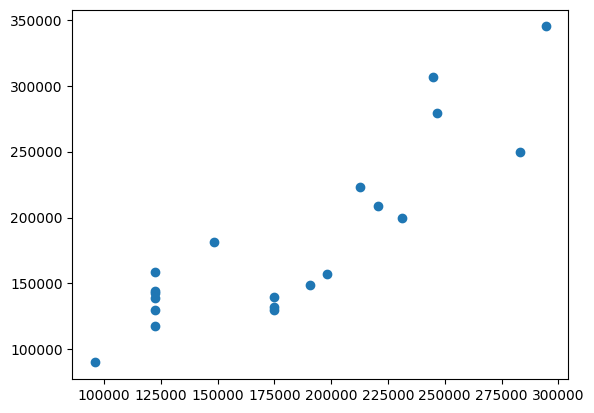

In [ ]:
# scatter plot of predictions versus the actual Y from the train data
plt.scatter(predictions, Y)

In [ ]:
# select all the rows with all columns as training data
train1 = house_data.iloc[0:100,:]
train1.shape

(100, 82)

In [ ]:
# learn about the SalePrice Series
salePrice = train1['SalePrice']
salePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

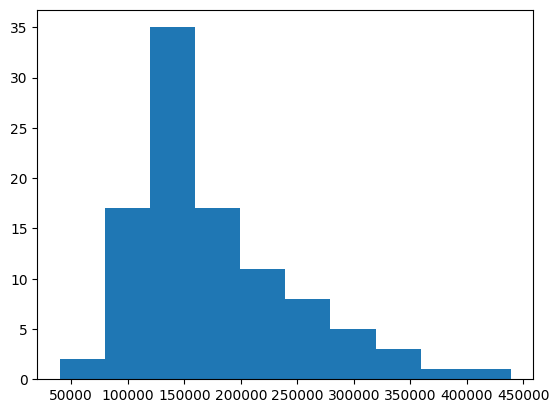

In [ ]:
# look at the distribution, which appears like a log-normal
plt.hist(salePrice)

(array([ 1.,  0.,  3.,  7., 21., 26., 18., 13.,  9.,  2.]),
 array([10.59663473, 10.8361466 , 11.07565847, 11.31517034, 11.55468221,
        11.79419408, 12.03370595, 12.27321782, 12.51272969, 12.75224156,
        12.99175343]),
 <BarContainer object of 10 artists>)

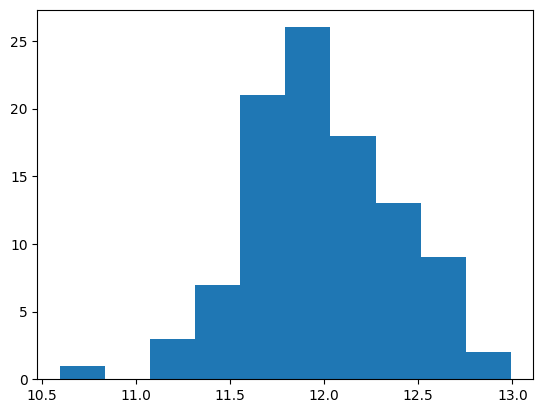

In [ ]:
# log() function returns the element-wise natural logarithms of an array
# this looks more normally distributed once you take the log of the sale price
# therefore, you coudl try to pick the log of the salePrice and transfrom it back to a $ amount
plt.hist(np.log(salePrice))

In [ ]:
# the skew() function returns unbiased skew over the requested axis
# the skew is calculated to be 1.17, which is quite significant
salePrice.skew()

1.1783462304851948

In [ ]:
# the skew of log data is reduced to -0.1, so it has reduced significantly
np.log(salePrice).skew()

-0.09632240207755555

In [ ]:
# target is now log of salePrice
target = np.log(salePrice)

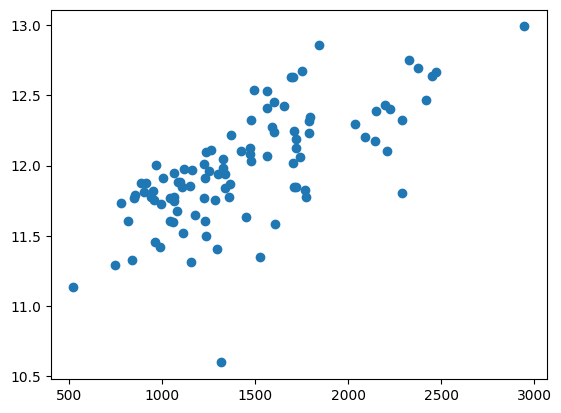

In [ ]:
# look at correlations between the cols and the transformed salePrice target
plt.scatter(train1['GrLivArea'], y=target)

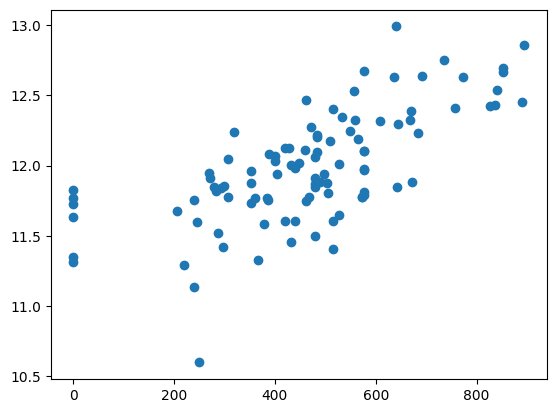

In [ ]:
plt.scatter(train1['GarageArea'], y=target)

In [ ]:
# find the nulls and look at the top top cols for nulls
# if we are to use any of these columns in our model, we will need to repair them
nulls=pd.DataFrame(train1.isnull().sum().sort_values(ascending=False))
nulls.head(20)

,0
PoolQC,100
Alley,94
MiscFeature,91
Fence,77
FireplaceQu,54
LotFrontage,14
GarageType,6
GarageYrBlt,6
GarageFinish,6
GarageQual,6


In [ ]:
# this code calculates the number of columns in the dataframe data that contain at least one missing value (NaN)
# there are 16 cols with nulls in train 1
sum(train1.isnull().sum() != 0)

16

In [ ]:
# repair the nulls in the cols with numeric data types
# interpolate fills in the missing values with linearly interpolated values between the existing data points
data = train1.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
data

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,60,73.5,9765,6,8,1993,1993,68.0,...,232,63,0,0,0,0,480,4,2009,185000
96,96,97,20,78.0,10264,7,5,1999,1999,183.0,...,158,29,0,0,0,0,0,8,2006,214000
97,97,98,20,73.0,10921,4,5,1965,1965,48.0,...,120,0,0,0,0,0,0,5,2007,94750
98,98,99,30,85.0,10625,5,5,1920,1950,0.0,...,0,0,77,0,0,0,400,5,2010,83000


In [ ]:
# there are now no nulls in the data df, as the the nulls have been replaced by interpolation
sum(data.isnull().sum() != 0)

0

In [ ]:
# find the correlations with the columns with numeric datatypes
numeric1 = data.select_dtypes(include=[np.number])
numeric1.head()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
# use the top 6 correlated columns (i.e. top 5 excluding SalePrice itself)
corr1 = numeric1.corr()
cols3 = corr1['SalePrice'].sort_values(ascending=False)[0:6]
cols3

SalePrice      1.000000
OverallQual    0.855061
GrLivArea      0.735129
GarageArea     0.688249
GarageCars     0.663441
YearBuilt      0.658636
Name: SalePrice, dtype: float64

In [ ]:
# top 6 as an index Series
cols4 = corr1['SalePrice'].sort_values(ascending=False)[0:6].index
cols4

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt'],
      dtype='object')

In [ ]:
X1 = data[cols4]
X1

,SalePrice,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt
0,208500,7,1710,548,2,2003
1,181500,6,1262,460,2,1976
2,223500,7,1786,608,2,2001
3,140000,7,1717,642,3,1915
4,250000,8,2198,836,3,2000
...,...,...,...,...,...,...
95,185000,6,1470,420,2,1993
96,214000,7,1588,472,2,1999
97,94750,4,960,432,1,1965
98,83000,5,835,366,1,1920


In [ ]:
Y1 = X1['SalePrice']
Y1

0     208500
1     181500
2     223500
3     140000
4     250000
       ...  
95    185000
96    214000
97     94750
98     83000
99    128950
Name: SalePrice, Length: 100, dtype: int64

In [ ]:
X1 = X1.drop(['SalePrice'], axis=1)
X1

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt
0,7,1710,548,2,2003
1,6,1262,460,2,1976
2,7,1786,608,2,2001
3,7,1717,642,3,1915
4,8,2198,836,3,2000
...,...,...,...,...,...
95,6,1470,420,2,1993
96,7,1588,472,2,1999
97,4,960,432,1,1965
98,5,835,366,1,1920


In [ ]:
# RSquared now increase to 0.83
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X1, Y1)
predictions1 = model.predict(X1)
print(f"R^2 is: {model.score(X1,Y1)}")

R^2 is: 0.8309859964337731


(array([ 2.,  4., 19., 26., 26., 13.,  6.,  2.,  0.,  2.]),
 array([-72416.69551558, -54597.83016337, -36778.96481115, -18960.09945894,
         -1141.23410673,  16677.63124549,  34496.4965977 ,  52315.36194991,
         70134.22730213,  87953.09265434, 105771.95800655]),
 <BarContainer object of 10 artists>)

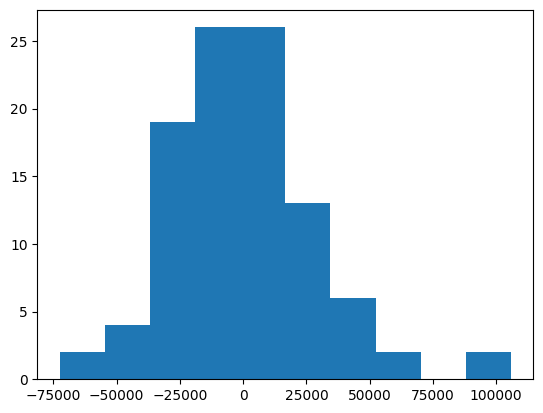

In [ ]:
# the error should look like a normal distribution
plt.hist(Y1 - predictions1)

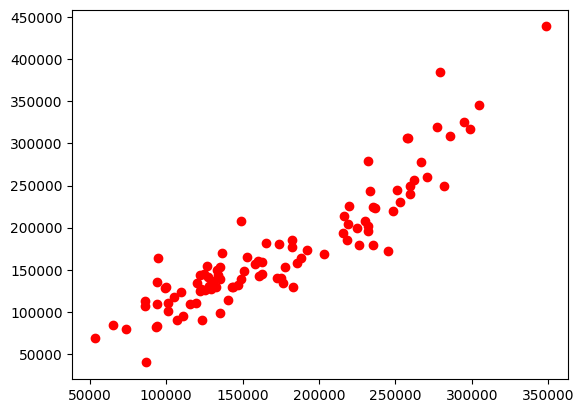

In [ ]:
# scatter plot should like a diagonal line
plt.scatter(predictions1, Y1, color ='r')

In [ ]:
# test against unseen data
test = pd.read_csv("/content/sample_data/jtest.csv")
test.shape

(100, 82)

In [ ]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [ ]:
X2 = test[cols4]
X2

,SalePrice,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt
0,205000,6,1610,480,2,1977
1,178000,6,1732,476,2,1985
2,118964,5,1535,410,2,1979
3,198900,7,1226,740,3,2009
4,169500,7,1818,240,1,1931
...,...,...,...,...,...,...
95,148500,6,1456,440,2,1976
96,311872,7,1726,786,3,2007
97,235000,8,3112,795,2,1918
98,104000,6,2229,0,0,1912


In [ ]:
Y2 = X2['SalePrice']
Y2

0     205000
1     178000
2     118964
3     198900
4     169500
       ...  
95    148500
96    311872
97    235000
98    104000
99    274900
Name: SalePrice, Length: 100, dtype: int64

In [ ]:
X2 = X2.drop(['SalePrice'], axis=1)
X2

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt
0,6,1610,480,2,1977
1,6,1732,476,2,1985
2,5,1535,410,2,1979
3,7,1226,740,3,2009
4,7,1818,240,1,1931
...,...,...,...,...,...
95,6,1456,440,2,1976
96,7,1726,786,3,2007
97,8,3112,795,2,1918
98,6,2229,0,0,1912


In [ ]:
# use trained model with unseen test data
predictions2 = model.predict(X2)
print(f"R^2 is: {model.score(X2,Y2)}")

R^2 is: 0.7403341313192588
